# 3D Scatterplot Demonstration

Code based on this heavyweight 'advanced matplotlib' [blogpost](https://medium.com/sfu-big-data/advanced-visualization-for-data-scientists-with-matplotlib-15c28863c41c)

In [2]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

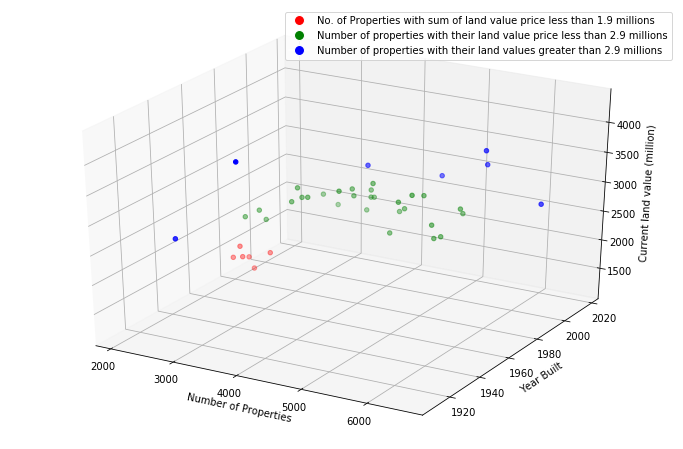

In [6]:
# Get the Property Tax Report dataset
# Dataset link: https://data.vancouver.ca/datacatalogue/propertyTax.htm
data = pd.read_csv('data/property_tax_report_2018.csv')


# Extract the columns and do some transformations
yearWiseAgg = data[['PID','CURRENT_LAND_VALUE']].groupby(data['YEAR_BUILT']).agg({'PID':'count','CURRENT_LAND_VALUE':'sum'})
yearWiseAgg = yearWiseAgg.reset_index().dropna()

# Get only records which have more than 2000 properties built per year
morethan2k = yearWiseAgg.query('PID>2000')


# Define colors as red, green, blue
colors = ['r', 'g', 'b']

# Get shape of dataframe
dflen = morethan2k.shape[0]

# Fetch land values from dataframe
lanvalues = (morethan2k['CURRENT_LAND_VALUE']/2e6).tolist()


# Create a list of colors for each point corresponding to x and y
c_list = []
for i,value in enumerate(lanvalues):
    if value>0 and value<1900:
        c_list.append(colors[0])
    elif value>=1900 and value<2900:
        c_list.append(colors[1])
    else:
        c_list.append(colors[2])


# Create figure object
fig = plt.figure(figsize=(12,8))

# Get the current axes, creating one if necessary.
ax = fig.gca(projection='3d')
        
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(morethan2k['PID'], morethan2k['YEAR_BUILT'], morethan2k['CURRENT_LAND_VALUE']/2e6,c=c_list)

# Set labels according to axis
plt.xlabel('Number of Properties')
plt.ylabel('Year Built')
ax.set_zlabel('Current land value (million)')

# Create customized legends 
legend_elements = [Line2D([0], [0], marker='o', color='w', label='No. of Properties with sum of land value price less than 1.9 millions',markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land value price less than 2.9 millions',markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Number of properties with their land values greater than 2.9 millions',markerfacecolor='b', markersize=10)
                  ]

# Make legend
ax.legend(handles=legend_elements, loc='best')

plt.show()

## Rotate 3D Plot

In [ ]:
https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

## Do The Same in 2 lines of Code with Plotly Express

In [12]:
df_plotly = morethan2k.copy()
df_plotly['CURRENT_LAND_VALUE'] = df_plotly['CURRENT_LAND_VALUE']/2e6
df_plotly['COLOR'] = c_list

In [13]:
df_plotly.head()

,YEAR_BUILT,PID,CURRENT_LAND_VALUE,COLOR
18,1910.0,2910,2917.513402,b
20,1912.0,3826,4321.246108,b
82,1974.0,2290,1513.965702,r
83,1975.0,2224,1670.616803,r
84,1976.0,2082,1427.859501,r


In [16]:
import plotly_express as px

px.scatter_3d(df_plotly, x="PID", y="YEAR_BUILT", z="CURRENT_LAND_VALUE", color="COLOR", 
              size="CURRENT_LAND_VALUE", hover_name="PID", symbol="COLOR",
              color_discrete_map = {"b": "blue", "r": "red", "g":"green"})

---